In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 + (point1[2] - point2[2]) ** 2)

In [5]:
def initialize_population(pop_size, num_points):
    population = []
    for _ in range(pop_size):
        chromosome = np.random.permutation(num_points)
        population.append(chromosome)
    return population

In [6]:
def fitness(chromosome, points):
    total_distance = 0
    origin = points[0]  
    current_point = origin
    for index in chromosome:
        next_point = points[index + 1] 
        total_distance += calculate_distance(current_point, next_point)
        current_point = next_point
    total_distance += calculate_distance(current_point, origin)
    fitness = 1 / (1 + total_distance) 
    return fitness

In [7]:
def tournament_selection(population, fitness_scores, tournament_size=3):
    tournament = np.random.choice(len(population), tournament_size, replace=False)
    tournament_fitness = [fitness_scores[i] for i in tournament]
    winner_index = tournament[np.argmax(tournament_fitness)]
    return population[winner_index]

In [8]:
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(np.random.choice(range(size), 2, replace=False))  
    offspring = np.empty(size, dtype=parent1.dtype)
    offspring[start:end] = parent1[start:end]  
    fill_values = [item for item in parent2 if item not in offspring[start:end]]
    offspring[:start] = fill_values[:start]
    offspring[end:] = fill_values[start:]
    return offspring


In [9]:
def mutate(chromosome, mutation_rate):
    size = len(chromosome)
    for _ in range(int(size * mutation_rate)):
        idx1, idx2 = np.random.choice(size, 2, replace=False)
        chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome


In [15]:
def genetic_algorithm(points, pop_size, num_generations, mutation_rate):
    num_points = len(points) - 1  
    population = initialize_population(pop_size, num_points)
    best_solution = None
    best_fitness = float('-inf')
    generation_data = []


    for generation in range(num_generations):
        fitness_scores = [fitness(chromo, points) for chromo in population]
        generation_best_fitness = max(fitness_scores)
        if generation_best_fitness > best_fitness:
            best_fitness = generation_best_fitness
            best_solution = population[fitness_scores.index(best_fitness)]

        new_population = []
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, fitness_scores)
            parent2 = tournament_selection(population, fitness_scores)
            offspring = crossover(parent1, parent2)
            offspring = mutate(offspring, mutation_rate)
            new_population.append(offspring)

        population = new_population
        min_fitness = min(fitness_scores)
        max_fitness = max(fitness_scores)
        mean_fitness = np.mean(fitness_scores)
        
        generation_data.append({
            "Generation": generation,
            "Score Fitness" : fitness_scores,
            "Min Fitness": min_fitness,
            "Max Fitness": max_fitness,
            "Mean Fitness": mean_fitness,
        })
    
        
    df = pd.DataFrame(generation_data)
    df.to_csv("generation_data.csv", index=False)

    return best_solution, best_fitness, df

            Min Fitness  Max Fitness  Mean Fitness   Std Fitness
Generation                                                      
0              0.000961     0.001801      0.001311  2.021610e-04
1              0.001030     0.002058      0.001401  2.283514e-04
2              0.001030     0.002400      0.001523  2.586237e-04
3              0.001201     0.002617      0.001670  3.037345e-04
4              0.001109     0.002878      0.001736  3.121269e-04
...                 ...          ...           ...           ...
95             0.002878     0.002878      0.002878  4.336809e-19
96             0.002878     0.002878      0.002878  4.336809e-19
97             0.002878     0.002878      0.002878  4.336809e-19
98             0.002878     0.002878      0.002878  4.336809e-19
99             0.002878     0.002878      0.002878  4.336809e-19

[100 rows x 4 columns]


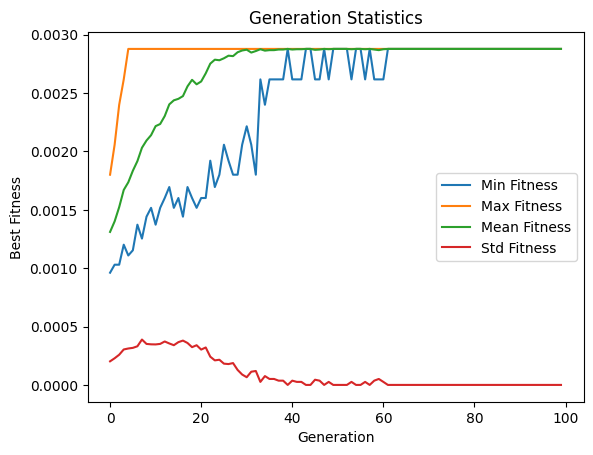

In [16]:
points_example = [(0,0,0), (10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70), (80,80,80), (90,90,90), (100,100,100)]  

best_solution, best_fitness, df = genetic_algorithm(
    points=points_example, pop_size=100, num_generations=100, mutation_rate=0.01
)

df['Std Fitness'] = df['Score Fitness'].apply(np.std)

stats_df = df.groupby('Generation').agg({
    'Min Fitness': 'min',
    'Max Fitness': 'max',
    'Mean Fitness': 'mean',
    'Std Fitness': 'mean'
})

print(stats_df)

stats_df.plot(kind='line')
plt.title('Generation Statistics')
plt.ylabel('Best Fitness')
plt.show()